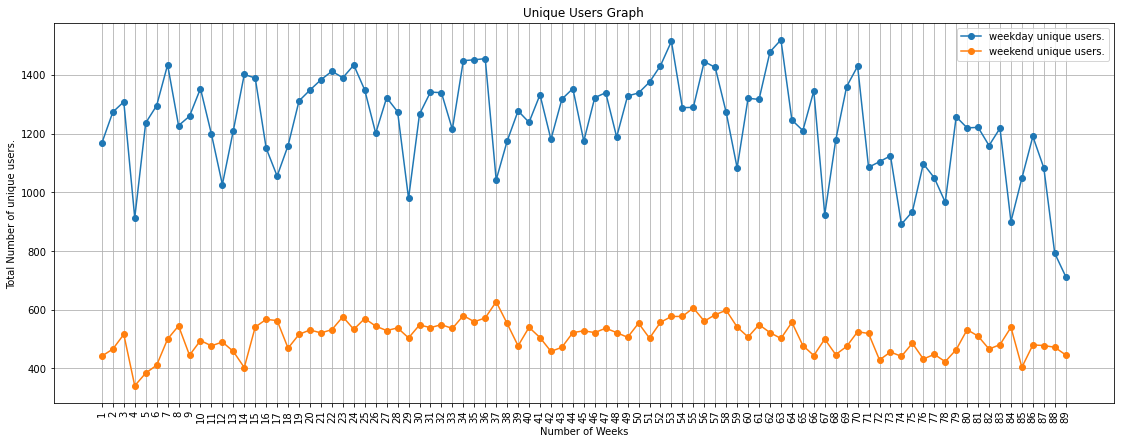

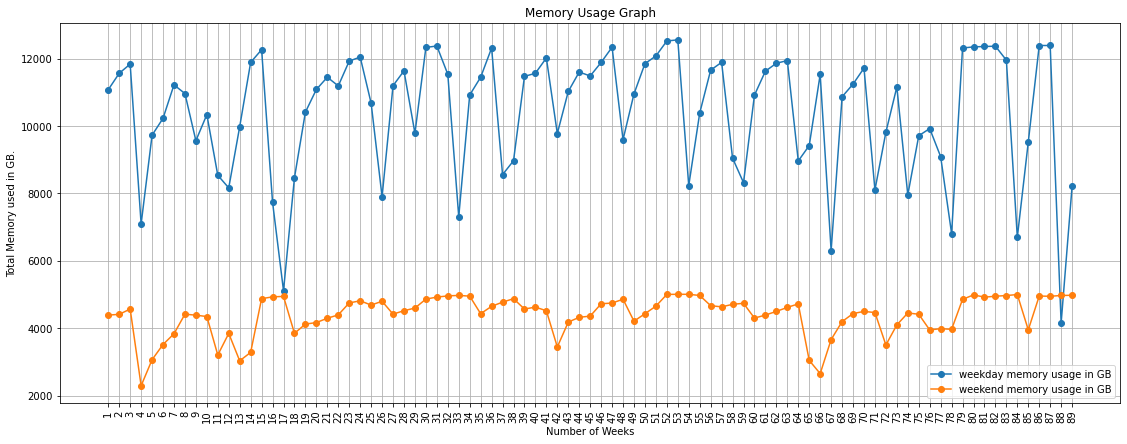

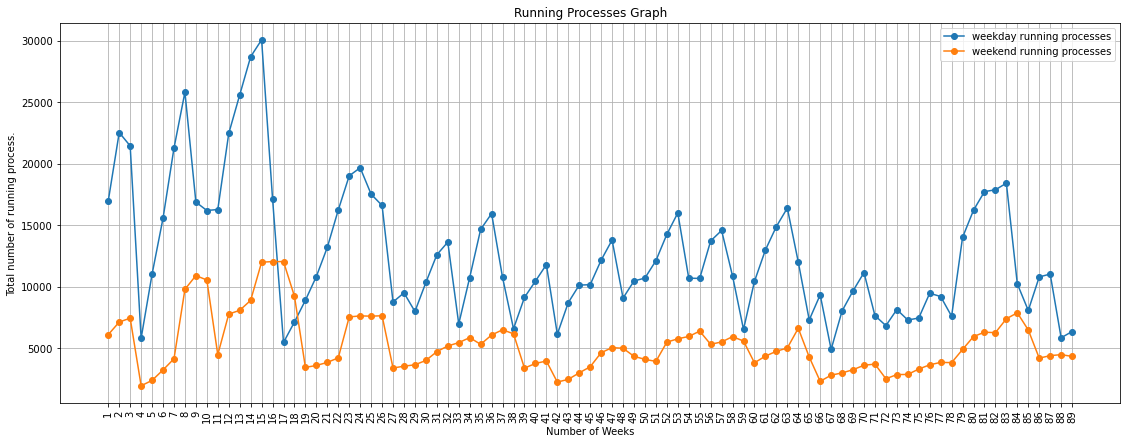

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = '../Data/weekends_holidays - weekends_holidays.csv'
df = pd.read_csv(file)
lis = []
# creating the list of holidays according to the csv-file date-hour column format.
for a,b in df.iterrows():
    date = b[0].split('-')
    months = {'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    date = months[date[1]]+date[0]+'_'+date[2]
    lis.append(date)


def finding_correlation(arg):

    csv_path = '../SMC-Data_Challenge/csv_files/'
    csvs = ['Jan2020','Feb2020','Mar2020','Apr2020','May2020','Jun2020',
        'Jul2020','Aug2020','Sep2020','Oct2020','Nov2020','Dec2020',
        'Jan2021','Feb2021','Mar2021','Apr2021','May2021','Jun2021',
        'Jul2021','Aug2021','Sep2021','Oct2021','Nov2021','Dec2021']
    
    weekday= []
    weekend = []
    
    for i in csvs:
        # fetching the particular columns needed for the graphical correlation.
        df  = pd.read_csv(csv_path+i+'.csv',usecols=['date-hour','login-node',arg])
        new_df = df.sort_values(by=['date-hour','login-node'])
    
        month = new_df.iloc[-1][0][0:3]
        year = new_df.iloc[-1][0][5:10]
        end = int(new_df.iloc[-1][0][3:5])
        
        wu = []
        weku = []
        
        for j in range(1,end):
            if j <= 9:
                date = month+'0'+ str(j) + year
            else:
                date = month + str(j) + year
        
            abc = new_df[new_df['date-hour'].str.contains(date)]
        
            if date in lis and abc[arg].sum() != 0:
                # if the sum is 0 that means the column of that date is not present in that dataframe.
                # missing files.
                weku.append(abc[arg].sum()//(len(abc)//len(set(abc['login-node']))))
                
                # hourly ratio for the values in ratio of 5:2 in the graph.
                
            if date not in lis and abc[arg].sum() != 0: 
                wu.append(abc[arg].sum()//(len(abc)//len(set(abc['login-node']))))
                
                # hourly ratio for the values in ratio of 5:2 in the graph.
                
        # appending the values at the end of every month the the main list of weekday v/s weekend usage.
        counter = 0
        while len(wu[counter*5:]) >= 5 and len(weku[counter*2:])>=2:
            weekday.append(sum(wu[counter*5:counter*5 + 5]))
            weekend.append(sum(wu[counter*2:counter*2 + 2]))
            counter +=1
    # number of weeks to be plotted on x-axis.
    x_values = np.array([ i for i in range(1,len(weekday)+1)])
    
    # the weekday values. 
    w_values = np.array(weekday)
    
    # the weekend/holidays values.
    we_values = np.array(weekend)
    
    # stretched the graph to the x-axis and set a default size for adding new graphs.
    plt.rcParams['figure.figsize']=(19,7)
    plt.xlabel('Number of Weeks')
    
    if arg == 'wusers':
        plt.title('Unique Users Graph')
        plt.ylabel('Total Number of unique users.')
        plt.plot(x_values,w_values,label='weekday unique users.',marker='o')
        plt.plot(x_values,we_values,label='weekend unique users.',marker='o')
        plt.legend()
    elif arg  == 'memory-used':
        plt.title('Memory Usage Graph')
        plt.ylabel('Total Memory used in GB.')
        plt.plot(x_values,w_values,label='weekday memory usage in GB',marker='o')
        plt.plot(x_values,we_values,label='weekend memory usage in GB',marker='o')
        plt.legend()
    elif arg  == 'running-process':
        plt.title('Running Processes Graph')
        plt.ylabel('Total number of running process.')
        plt.plot(x_values,w_values,label='weekday running processes',marker='o')
        plt.plot(x_values,we_values,label='weekend running processes',marker='o')
        plt.legend()
    
    
    
    plt.grid()
    plt.xticks(x_values,rotation=90)
    plt.show()
   
    
    
    
# finding the correlation of following list values.
relation = ['wusers','memory-used','running-process']

for i in relation:
    finding_correlation(i)